In [1]:
# First version of this code:
# - https://github.com/biplav-s/course-nl/blob/master/l9-ml-review/Basic%20TensorFlow%20and%20Keras.ipynb
#
## References
#  - Keras for prediction: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
#  - Visalizing: https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e



In [2]:
## For installation, if not present 
#
# Tensorflow first
# -- From tensorflow 1.x to 2.x, may have to uninstall previous one
#!pip uninstall tensorflow
#!pip uninstall protobuf
# ---
#!pip install tensorflow
#
# -- Other libraries
#!pip install keras
#!pip install ann_visualizer
#!pip install graphviz

In [3]:
# Load keras
from keras.models import Sequential
from keras.layers import Dense
# first neural network with keras tutorial
from numpy import loadtxt

In [4]:
# load the dataset
dataset = loadtxt('./data/pima-indians-diabetes.csv', delimiter=',')

In [5]:
# Show dataset
print (dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [6]:
# First 8 columns are the input to NN, last is output label
X = dataset[:,0:8]
y = dataset[:,8]



In [7]:
# The keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [9]:
# See summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [10]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 970us/step - loss: 1.6501 - accuracy: 0.5391
Epoch 2/150
77/77 [==============================] - 0s 915us/step - loss: 0.9616 - accuracy: 0.5768
Epoch 3/150
77/77 [==============================] - 0s 906us/step - loss: 0.8613 - accuracy: 0.6003
Epoch 4/150
77/77 [==============================] - 0s 908us/step - loss: 0.8238 - accuracy: 0.5846
Epoch 5/150
77/77 [==============================] - 0s 899us/step - loss: 0.7677 - accuracy: 0.6094
Epoch 6/150
77/77 [==============================] - 0s 924us/step - loss: 0.7380 - accuracy: 0.6172
Epoch 7/150
77/77 [==============================] - 0s 948us/step - loss: 0.7242 - accuracy: 0.6393
Epoch 8/150
77/77 [==============================] - 0s 945us/step - loss: 0.6962 - accuracy: 0.6523
Epoch 9/150
77/77 [==============================] - 0s 888us/step - loss: 0.6861 - accuracy: 0.6406
Epoch 10/150
77/77 [==============================] - 0s 932us/step - loss: 0.7209 - accura

In [11]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 925us/step - loss: 0.4664 - accuracy: 0.7826
Accuracy: 78.26


In [12]:
# Make predictions. Assuming X is also the data to predict on
predictions = model.predict(X)

24/24 [==============================] - 0s 756us/step


In [13]:
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)


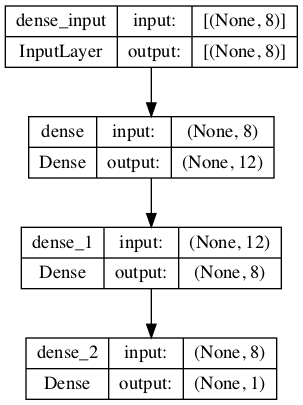

In [15]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='data/classification-pima.png')